In [1]:
# Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy import stats
import statsmodels.api as sm
import warnings
from itertools import product
from datetime import datetime
warnings.filterwarnings('ignore')
plt.style.use('seaborn-poster')

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
# Load data
df = pd.read_csv('./kecc.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-12-03,5050,5100,4925,5010,4546.923828,20660
1,2012-12-04,5000,5070,4970,5020,4555.999512,24000
2,2012-12-05,5030,5160,4980,5150,4673.983887,27311
3,2012-12-06,5140,5180,5040,5050,4583.227051,13000
4,2012-12-07,5100,5100,5000,5010,4546.923828,24100


In [3]:
# Unix-time to 
df.Timestamp = pd.to_datetime(df.Date)

# Resampling to daily frequency
df.index = df.Timestamp
df = df.resample('D').mean()

# Resampling to monthly frequency
df_month = df.resample('M').mean()

# Resampling to annual frequency
df_year = df.resample('A-DEC').mean()

# Resampling to quarterly frequency
df_Q = df.resample('Q-DEC').mean()

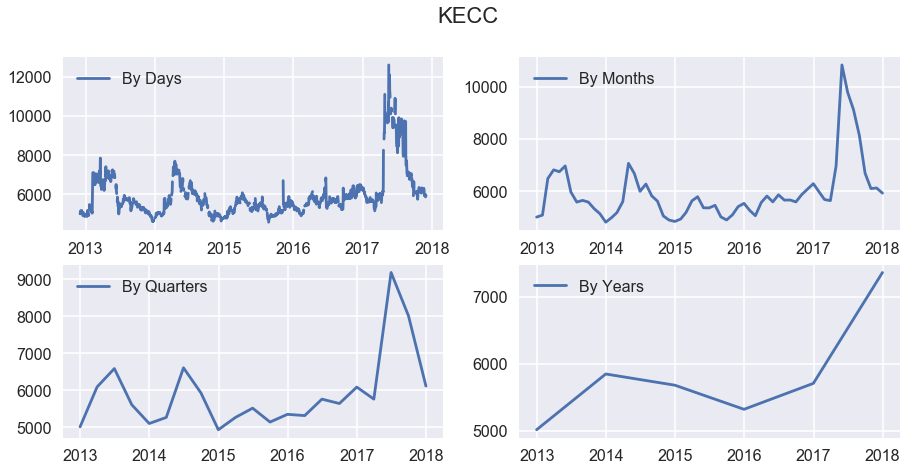

In [4]:
fig = plt.figure(figsize=[15, 7])
plt.suptitle('KECC', fontsize=22)

plt.subplot(221)
plt.plot(df.Close, '-', label='By Days')
plt.legend()

plt.subplot(222)
plt.plot(df_month.Close, '-', label='By Months')
plt.legend()

plt.subplot(223)
plt.plot(df_Q.Close, '-', label='By Quarters')
plt.legend()

plt.subplot(224)
plt.plot(df_year.Close, '-', label='By Years')
plt.legend()

# plt.tight_layout()
plt.show()

Dickey–Fuller test: p=0.010981


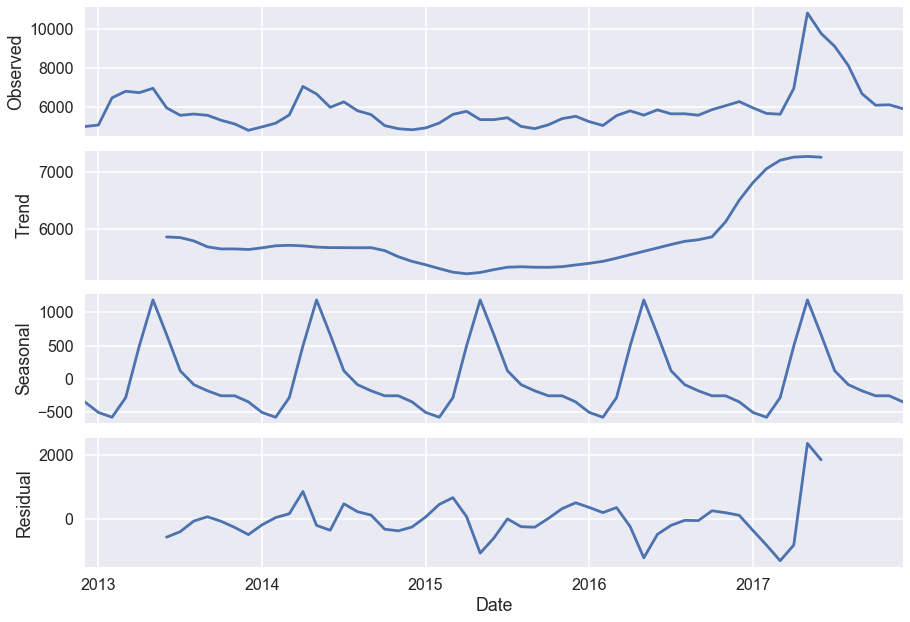

In [5]:
plt.figure(figsize=[15,7])
sm.tsa.seasonal_decompose(df_month.Close).plot()
print("Dickey–Fuller test: p=%f" % sm.tsa.stattools.adfuller(df_month.Close)[1])
plt.show()

In [6]:
df_month['prices_box_diff'] = df_month.Close - df_month.Close.shift(12)

print("Dickey–Fuller test: p=%f" % sm.tsa.stattools.adfuller(df_month.prices_box_diff[12:])[1])
print(df_month['prices_box_diff'])

Dickey–Fuller test: p=0.134193
Date
2012-12-31            NaN
2013-01-31            NaN
2013-02-28            NaN
2013-03-31            NaN
2013-04-30            NaN
2013-05-31            NaN
2013-06-30            NaN
2013-07-31            NaN
2013-08-31            NaN
2013-09-30            NaN
2013-10-31            NaN
2013-11-30            NaN
2013-12-31    -194.555556
2014-01-31     -94.886364
2014-02-28   -1299.289474
2014-03-31   -1211.428571
2014-04-30     319.090909
2014-05-31    -291.954887
2014-06-30      27.368421
2014-07-31     690.000000
2014-08-31     170.690476
2014-09-30      35.292398
2014-10-31    -275.714286
2014-11-30    -243.714286
2014-12-31      27.809524
2015-01-31     -53.630952
2015-02-28       8.205882
2015-03-31      27.337662
2015-04-30   -1274.090909
2015-05-31   -1310.029240
                 ...     
2015-07-31    -813.478261
2015-08-31    -802.833333
2015-09-30    -717.986842
2015-10-31      41.904762
2015-11-30     514.666667
2015-12-31     690.714286
20

Dickey–Fuller test: p=0.000000


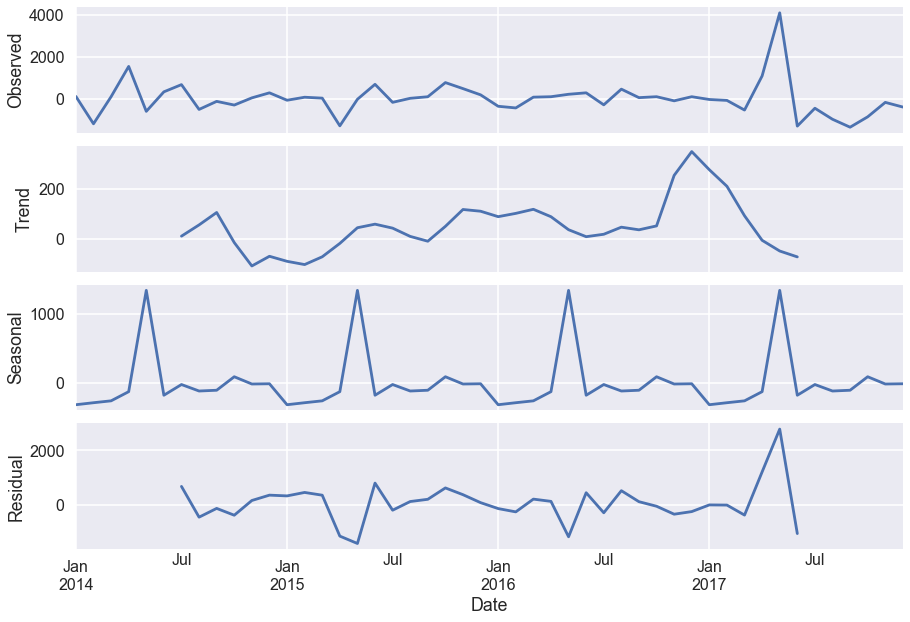

Date
2012-12-31            NaN
2013-01-31            NaN
2013-02-28            NaN
2013-03-31            NaN
2013-04-30            NaN
2013-05-31            NaN
2013-06-30            NaN
2013-07-31            NaN
2013-08-31            NaN
2013-09-30            NaN
2013-10-31            NaN
2013-11-30            NaN
2013-12-31            NaN
2014-01-31      99.669192
2014-02-28   -1204.403110
2014-03-31      87.860902
2014-04-30    1530.519481
2014-05-31    -611.045796
2014-06-30     319.323308
2014-07-31     662.631579
2014-08-31    -519.309524
2014-09-30    -135.398079
2014-10-31    -311.006683
2014-11-30      32.000000
2014-12-31     271.523810
2015-01-31     -81.440476
2015-02-28      61.836835
2015-03-31      19.131780
2015-04-30   -1301.428571
2015-05-31     -35.938331
                 ...     
2015-07-31    -181.277304
2015-08-31      10.644928
2015-09-30      84.846491
2015-10-31     759.891604
2015-11-30     472.761905
2015-12-31     176.047619
2016-01-31    -369.333333
2016-02

In [7]:
# Regular differentiation
df_month['prices_box_diff2'] = df_month.prices_box_diff - df_month.prices_box_diff.shift(1)
plt.figure(figsize=(15,7))

# STL-decomposition
sm.tsa.seasonal_decompose(df_month.prices_box_diff2[13:]).plot()   
print("Dickey–Fuller test: p=%f" % sm.tsa.stattools.adfuller(df_month.prices_box_diff2[13:])[1])



plt.show()

print(df_month['prices_box_diff2'])



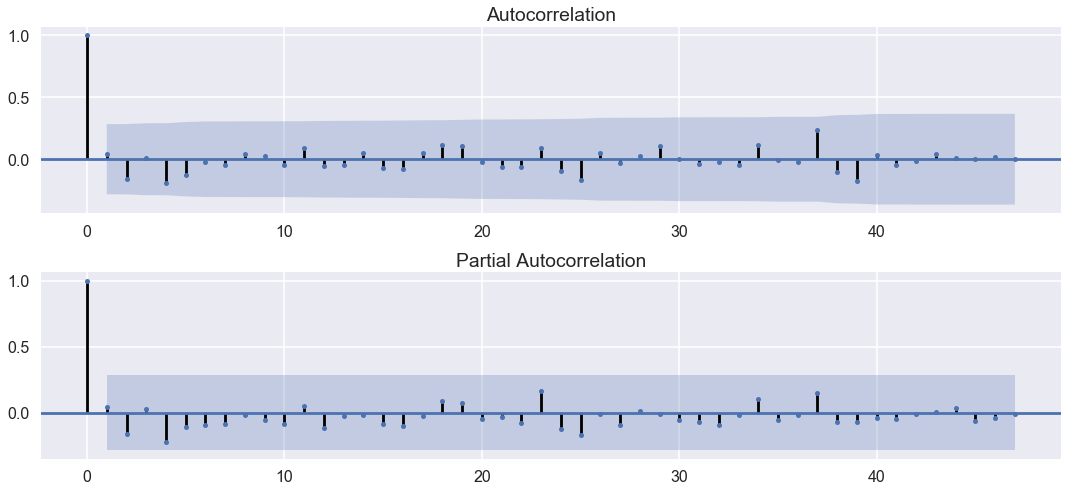

In [8]:
# Initial approximation of parameters using Autocorrelation and Partial Autocorrelation Plots
plt.figure(figsize=(15,7))
ax = plt.subplot(211)

sm.graphics.tsa.plot_acf(df_month.prices_box_diff2[13:].values.squeeze(), lags=47, ax=ax)

ax = plt.subplot(212)

sm.graphics.tsa.plot_pacf(df_month.prices_box_diff2[13:].values.squeeze(), lags=47, ax=ax)


plt.tight_layout()
plt.show()

In [9]:
# Initial approximation of parameters
Qs = range(0, 2)
qs = range(0, 3)
Ps = range(0, 3)
ps = range(0, 3)
D=1
d=1
parameters = product(ps, qs, Ps, Qs)
parameters_list = list(parameters)
len(parameters_list)

# Model Selection
results = []
best_aic = float("inf")
warnings.filterwarnings('ignore')
for param in parameters_list:
    try:
        model=sm.tsa.statespace.SARIMAX(df_month.Close, order=(param[0], d, param[1]), 
                                        seasonal_order=(param[2], D, param[3], 12)).fit(disp=-1)
    except ValueError:
        print('wrong parameters:', param)
        continue
    aic = model.aic
    if aic < best_aic:
        best_model = model
        best_aic = aic
        best_param = param
    results.append([param, model.aic])

wrong parameters: (0, 0, 0, 0)
wrong parameters: (0, 0, 0, 1)
wrong parameters: (0, 0, 1, 1)
wrong parameters: (0, 0, 2, 1)
wrong parameters: (0, 1, 0, 1)
wrong parameters: (0, 1, 1, 1)
wrong parameters: (0, 1, 2, 1)
wrong parameters: (0, 2, 0, 1)
wrong parameters: (0, 2, 1, 1)
wrong parameters: (0, 2, 2, 1)
wrong parameters: (1, 0, 0, 1)
wrong parameters: (1, 0, 1, 1)
wrong parameters: (1, 0, 2, 1)
wrong parameters: (1, 1, 0, 1)
wrong parameters: (1, 1, 1, 1)
wrong parameters: (1, 1, 2, 1)
wrong parameters: (1, 2, 0, 1)
wrong parameters: (1, 2, 1, 1)
wrong parameters: (1, 2, 2, 1)
wrong parameters: (2, 0, 0, 1)
wrong parameters: (2, 0, 1, 1)
wrong parameters: (2, 0, 2, 1)
wrong parameters: (2, 1, 0, 1)
wrong parameters: (2, 1, 1, 1)
wrong parameters: (2, 1, 2, 1)
wrong parameters: (2, 2, 0, 0)
wrong parameters: (2, 2, 0, 1)
wrong parameters: (2, 2, 1, 0)
wrong parameters: (2, 2, 1, 1)
wrong parameters: (2, 2, 2, 0)
wrong parameters: (2, 2, 2, 1)


In [10]:
result_table = pd.DataFrame(results)
result_table.columns = ['parameters', 'aic']
print(result_table.sort_values(by = 'aic', ascending=True).head())
print(best_model.summary())

      parameters         aic
0   (0, 0, 1, 0)  784.149408
1   (0, 0, 2, 0)  784.441589
14  (1, 2, 0, 0)  784.643133
8   (1, 0, 0, 0)  785.183568
2   (0, 1, 0, 0)  785.205489
                                 Statespace Model Results                                 
Dep. Variable:                              Close   No. Observations:                   61
Model:             SARIMAX(0, 1, 0)x(1, 1, 0, 12)   Log Likelihood                -390.075
Date:                            Mon, 04 Dec 2017   AIC                            784.149
Time:                                    15:29:33   BIC                            788.371
Sample:                                12-31-2012   HQIC                           785.804
                                     - 12-31-2017                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
-------------------

Dickey–Fuller test:: p=0.000000


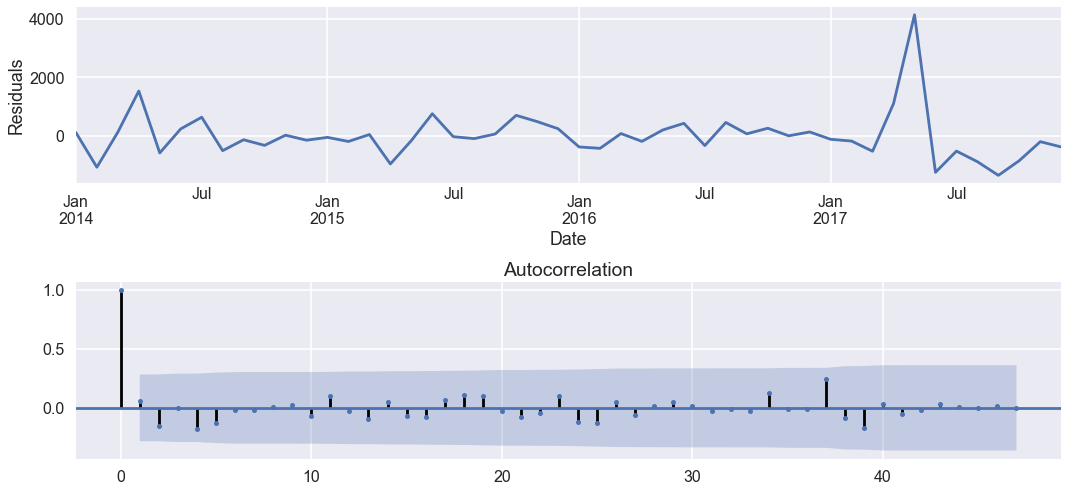

In [11]:
# STL-decomposition
plt.figure(figsize=(15,7))
plt.subplot(211)
best_model.resid[13:].plot()
plt.ylabel(u'Residuals')
ax = plt.subplot(212)
sm.graphics.tsa.plot_acf(best_model.resid[13:].values.squeeze(), lags=47, ax=ax)

print("Dickey–Fuller test:: p=%f" % sm.tsa.stattools.adfuller(best_model.resid[13:])[1])

plt.tight_layout()
plt.show()

                 0
count    61.000000
mean     25.691242
std    1086.303271
min   -3200.644281
25%    -383.409611
50%     -64.365079
75%     222.792208
max    5015.555556


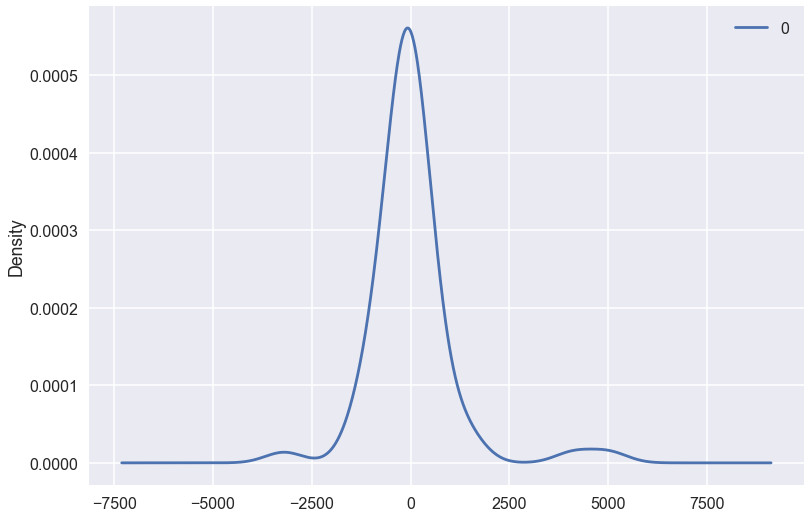

In [15]:
from pandas import DataFrame

residuals = DataFrame(best_model.resid)
residuals.plot(kind='kde')
print(residuals.describe())
plt.show()

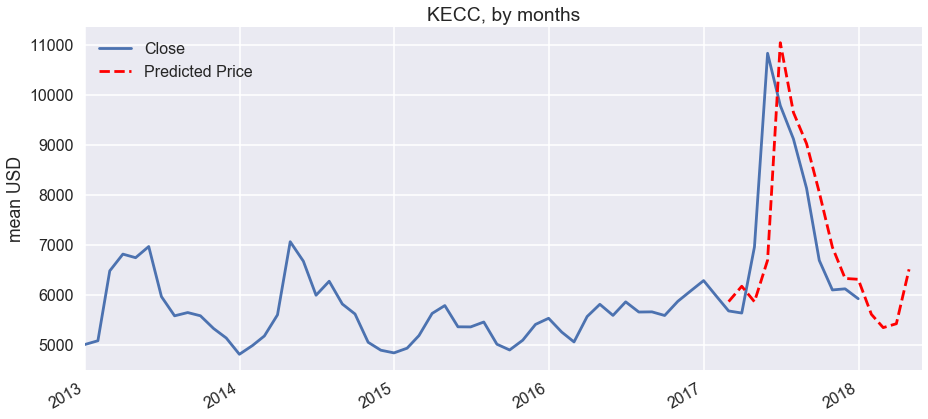

In [137]:
# Prediction
df_month2 = df_month[['Close']]
date_list = [ datetime(2018, 1, 31),
                 datetime(2018, 2, 28),
             datetime(2018, 3, 31),
             datetime(2018, 4, 30),
             datetime(2018, 5, 30)                          
            ]
future = pd.DataFrame(index=date_list, columns= df_month.columns)
df_month2 = pd.concat([df_month2, future])
df_month2['forecast'] = best_model.predict(start=50, end=80)
plt.figure(figsize=(15,7))
df_month2.Close.plot()
df_month2.forecast.plot(color='r', ls='--', label='Predicted Price')
plt.legend()
plt.title('KECC, by months')
plt.ylabel('mean USD')
plt.show()

In [ ]:
mod = sm.tsa.statespace.sarimax.SARIMAX(df.Close, trend='n', order=(0,1,0), seasonal_order=(1,1,1,12))
results = mod.fit()
print (results.summary())

In [ ]:
df['forecast'] = results.predict(start = 0, end= 3000, dynamic= True)  
df[['Close', 'forecast']].plot(figsize=(15,8))
plt.show()